# Employee Attrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.options.display.max_columns = 500
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
print(df.isna().sum())
print("-"*50)
print(df.duplicated().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Preprocessing
- Target -> Attrition -> need mapping
- Binary: Attrition, Gender, Over18 , OverTime
- OneHotEncoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [8]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Over18'] = df['Over18'].map({'Y':1, 'N':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})

In [11]:
df = df.join(pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='EducationField')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')).drop('MaritalStatus', axis=1)


In [12]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [13]:
# convert True and False to 1 , 0
df.replace({True:1, False:0}, inplace=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


- its better to use OneHotEncodding using sk-learn to ensure the apply is correct for any new data
- dummies not ensure that!

## Columns to Drop cause they are not important
- EmployeeNumber

In [14]:
df.drop('EmployeeNumber', axis=1, inplace=True)

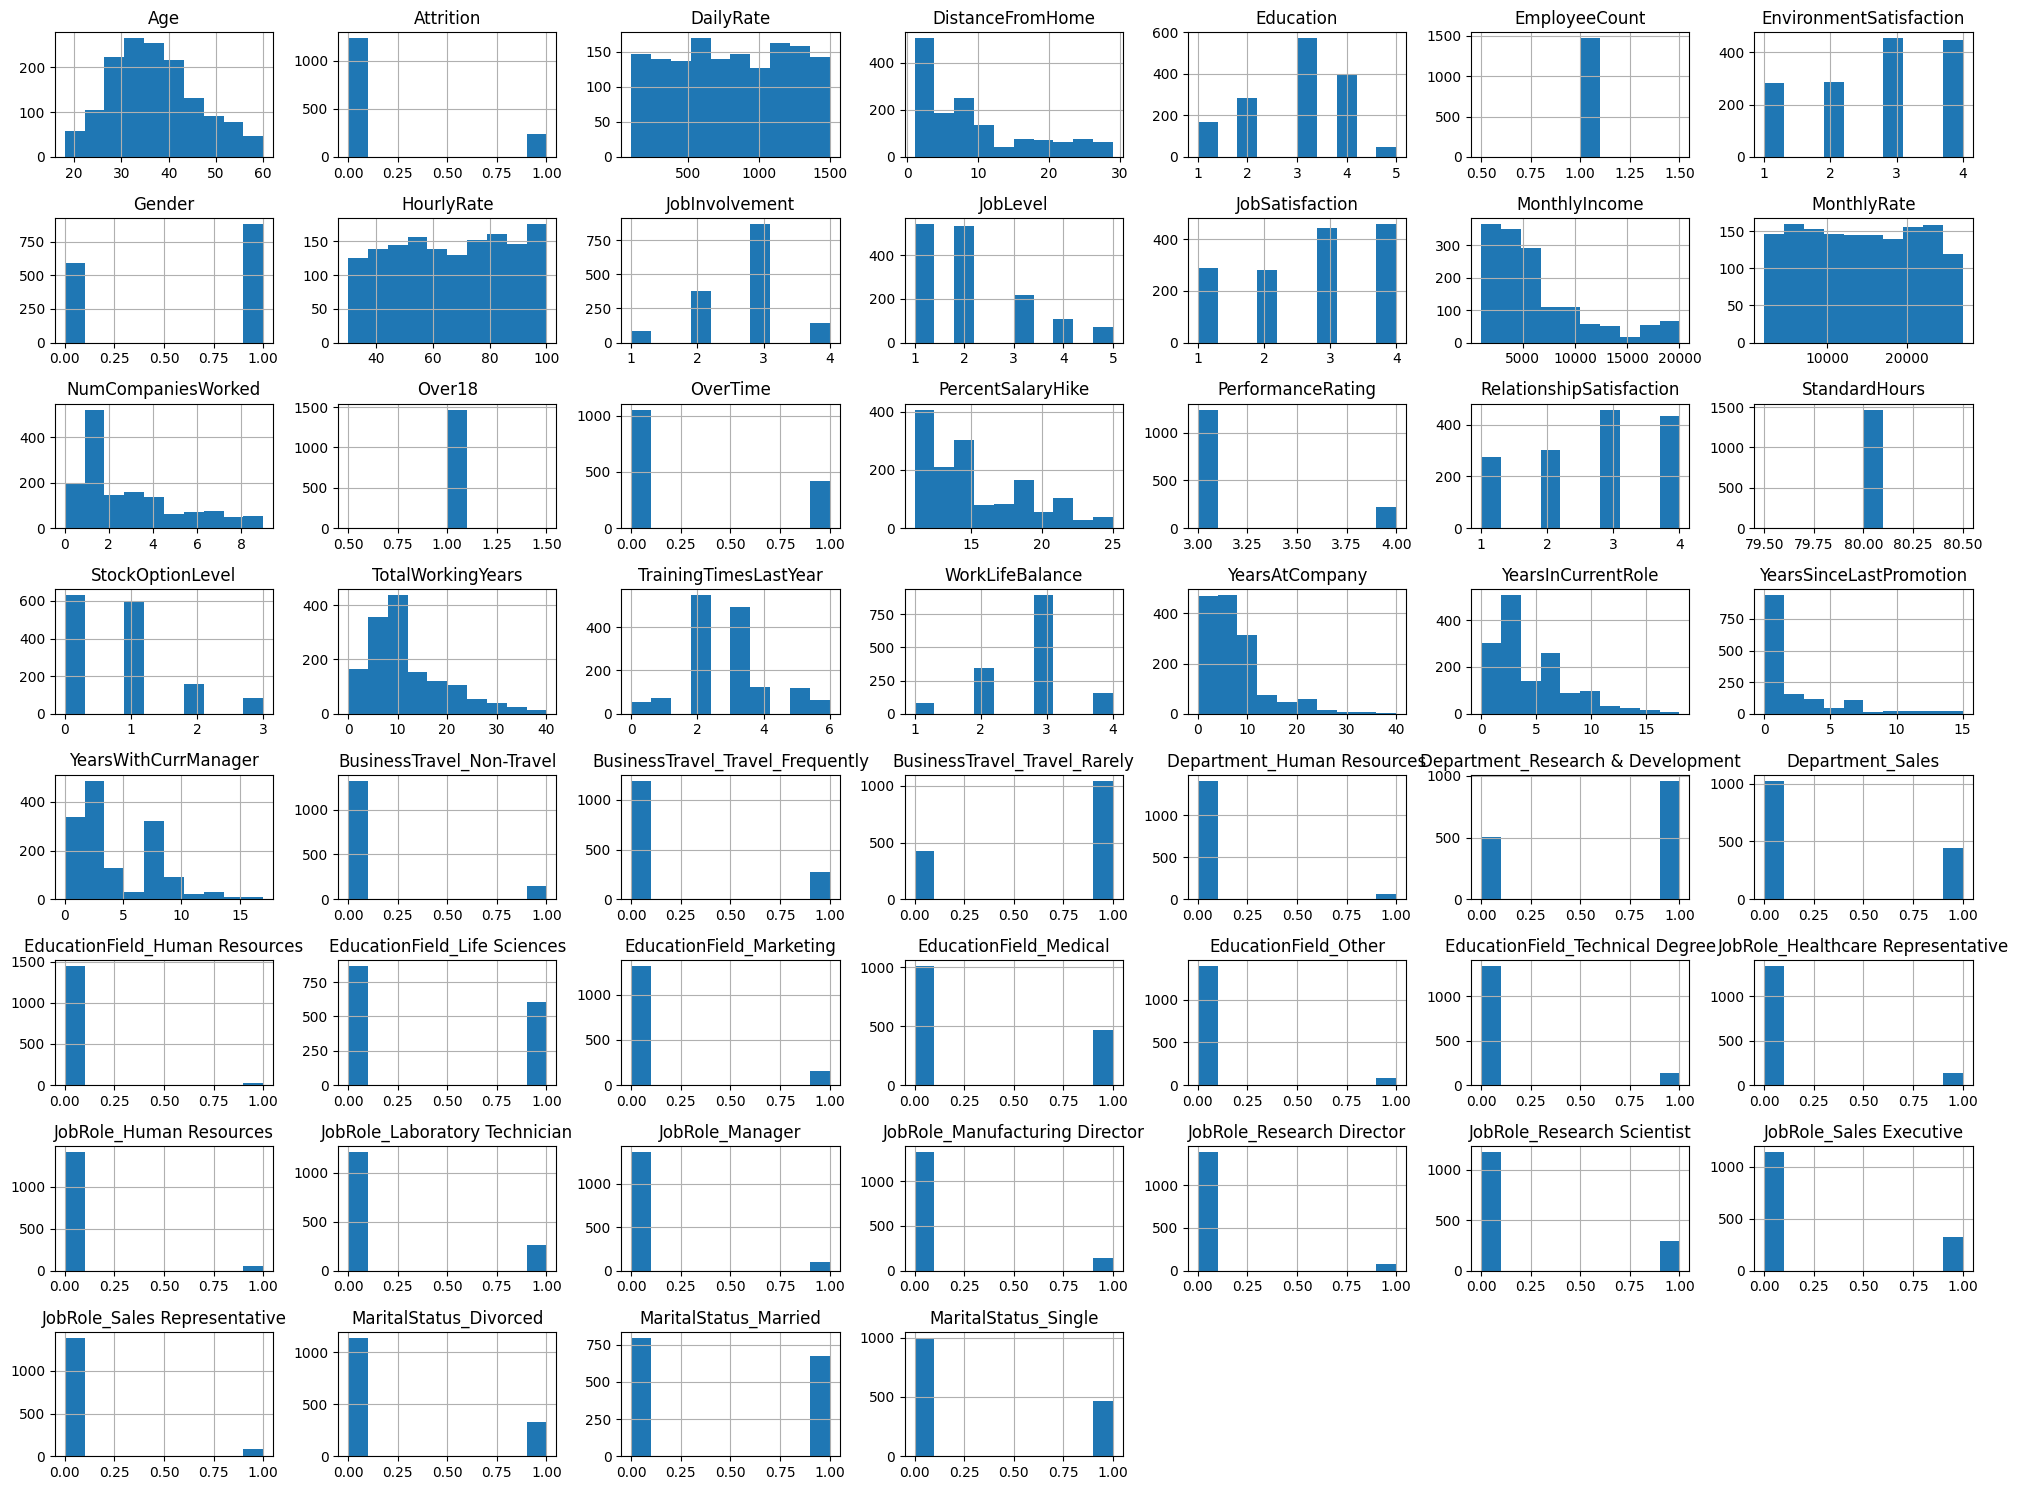

In [15]:
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [16]:
df.drop(columns=["Over18","StandardHours"],axis=1,inplace=True)

## Model Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
X , y = df.drop('Attrition', axis=1), df['Attrition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
print(f"Train score : {model.score(X_train, y_train)}")
print(f"Test Score : {model.score(X_test, y_test)}")

Train score : 1.0
Test Score : 0.8741496598639455


In [22]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



In [23]:
model.feature_importances_

array([0.05544387, 0.04741457, 0.04190885, 0.01809948, 0.        ,
       0.02188847, 0.00819927, 0.04302116, 0.02138414, 0.02066828,
       0.02537889, 0.08101395, 0.051933  , 0.03512558, 0.06183964,
       0.03374762, 0.00530478, 0.01921584, 0.02810013, 0.04465319,
       0.02679432, 0.02276464, 0.04102231, 0.02942448, 0.02643726,
       0.0351311 , 0.00409471, 0.01519117, 0.00671934, 0.00205533,
       0.00820939, 0.00772819, 0.002342  , 0.0065558 , 0.00508186,
       0.00845699, 0.00325937, 0.00847098, 0.0024487 , 0.00273128,
       0.0093792 , 0.00121815, 0.00320345, 0.00078559, 0.00541995,
       0.00575453, 0.00948344, 0.00577279, 0.00907202, 0.02065093])

In [29]:
feature_names = X_train.columns  # If you are using pandas DataFrame
importance = dict(sorted((zip(feature_names, model.feature_importances_)),key= lambda x: x[1], reverse=True))


In [30]:
importance

{'MonthlyIncome': 0.0810139512615328,
 'OverTime': 0.06183964263676035,
 'Age': 0.05544386833215009,
 'MonthlyRate': 0.05193300074607576,
 'DailyRate': 0.04741456685188804,
 'TotalWorkingYears': 0.04465319214377367,
 'HourlyRate': 0.043021160293316936,
 'DistanceFromHome': 0.04190885292052892,
 'YearsAtCompany': 0.041022310721248775,
 'YearsWithCurrManager': 0.035131099802726634,
 'NumCompaniesWorked': 0.035125575757343826,
 'PercentSalaryHike': 0.03374762409801795,
 'YearsInCurrentRole': 0.029424484738184695,
 'StockOptionLevel': 0.028100129855828528,
 'TrainingTimesLastYear': 0.026794319379953392,
 'YearsSinceLastPromotion': 0.026437264872184563,
 'JobSatisfaction': 0.02537889259906061,
 'WorkLifeBalance': 0.02276463502624412,
 'EnvironmentSatisfaction': 0.02188847394365582,
 'JobInvolvement': 0.021384143063945867,
 'JobLevel': 0.02066827740424872,
 'MaritalStatus_Single': 0.020650927559327677,
 'RelationshipSatisfaction': 0.019215840921599867,
 'Education': 0.01809947540169309,
 'Bu

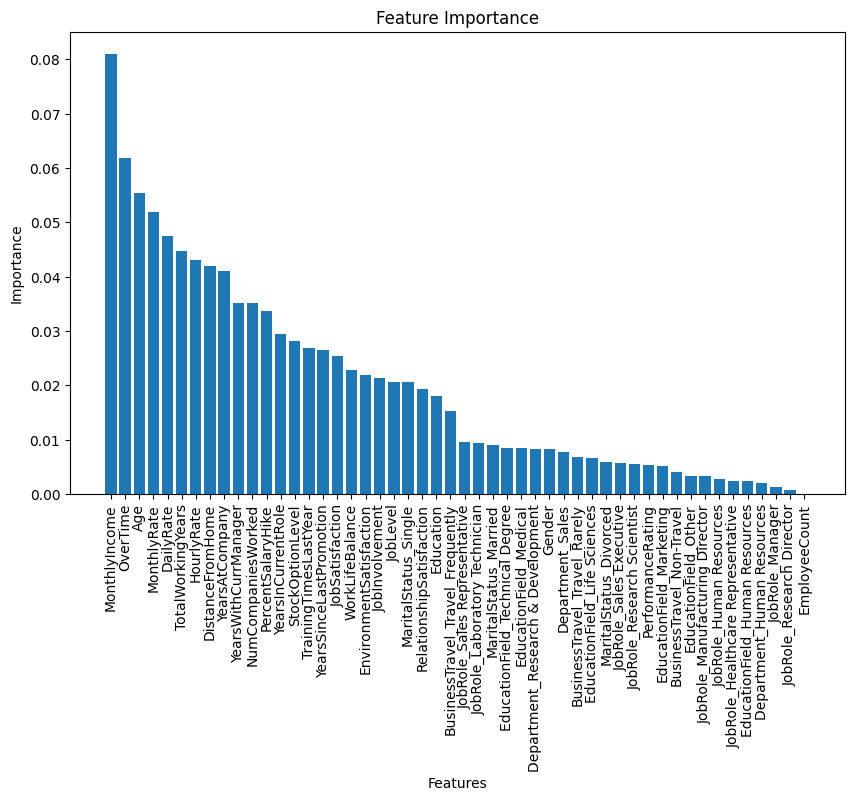

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(importance.keys(), importance.values())
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()